In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


In [3]:
matches_raw_df = pd.read_csv('data/matches.csv')


In [4]:
matches_raw_df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches_raw_df.shape


(756, 18)

In [6]:
matches_raw_df.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
matches_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
matches_raw_df['umpire3'].value_counts()


Nitin Menon                10
O Nandan                   10
C Shamshuddin              10
Anil Chaudhary              9
S Ravi                      8
Vineet Kulkarni             8
Bruce Oxenford              7
Yeshwant Barde              7
Anil Dandekar               7
Chris Gaffaney              6
Rod Tucker                  5
Marais Erasmus              5
Nigel Llong                 4
A Nanda Kishore             3
Nanda Kishore               3
Ian Gould                   3
A.D Deshmukh                2
K Ananthapadmanabhan        2
Virender Kumar Sharma       2
Kumar Dharmasena            2
Ulhas Gandhe                2
KN Anantapadmanabhan        1
Sundaram Ravi               1
KN Ananthapadmanabhan       1
Chettithody Shamshuddin     1
Name: umpire3, dtype: int64

In [9]:
matches_raw_df['result'].value_counts()


normal       743
tie            9
no result      4
Name: result, dtype: int64

In [10]:
matches_raw_df.drop(columns='umpire3', inplace=True)


In [11]:
matches_raw_df.shape


(756, 17)

In [12]:
matches_raw_df.head(2)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [13]:
matches_per_season = matches_raw_df.groupby('season').id.count()


In [14]:
matches_per_season


season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [15]:
matches_per_season.index


Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019],
           dtype='int64', name='season')

c:\Users\kurma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'no. of matchs plyed')]

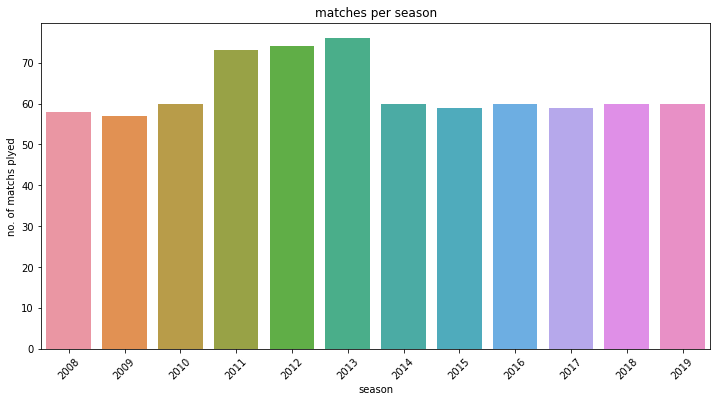

In [16]:
plt.figure(figsize=(12, 6))
plt.xlabel('--seasons--')
plt.ylabel('no. of matches played')
plt.xticks(rotation=45)
plt.title('matches per season')

sns.barplot(matches_per_season.index, matches_per_season).set(
    ylabel='no. of matchs plyed')


In [17]:
matches_raw_df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [18]:
matches_raw_df['toss_decision'].value_counts(normalize=True)


field    0.612434
bat      0.387566
Name: toss_decision, dtype: float64

In [19]:
matches_raw_df.groupby('season')['toss_decision'].value_counts(normalize=True)


season  toss_decision
2008    field            0.551724
        bat              0.448276
2009    bat              0.614035
        field            0.385965
2010    bat              0.650000
        field            0.350000
2011    field            0.657534
        bat              0.342466
2012    bat              0.500000
        field            0.500000
2013    bat              0.592105
        field            0.407895
2014    field            0.683333
        bat              0.316667
2015    field            0.576271
        bat              0.423729
2016    field            0.816667
        bat              0.183333
2017    field            0.813559
        bat              0.186441
2018    field            0.833333
        bat              0.166667
2019    field            0.833333
        bat              0.166667
Name: toss_decision, dtype: float64

In [20]:
match_decision_percentage = matches_raw_df.groupby(
    'season')['toss_decision'].value_counts(normalize=True).unstack()
match_decision_percentage


toss_decision,bat,field
season,,
2008,0.448276,0.551724
2009,0.614035,0.385965
2010,0.650000,0.350000
2011,0.342466,0.657534
2012,0.500000,0.500000
2013,0.592105,0.407895
2014,0.316667,0.683333
2015,0.423729,0.576271
2016,0.183333,0.816667


<AxesSubplot:title={'center':'Toss Decisions'}, xlabel='Seasons', ylabel='Percentage'>

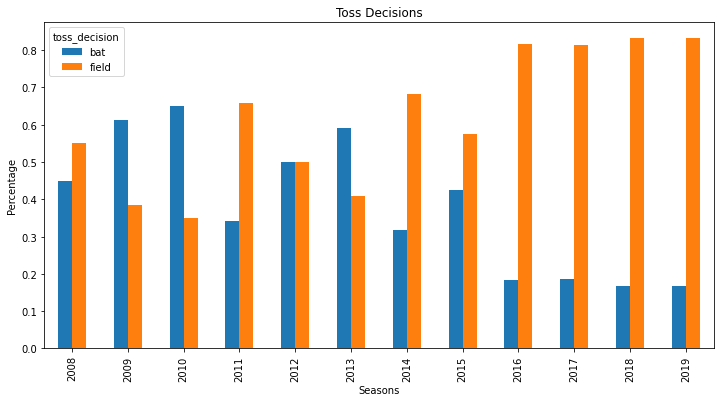

In [21]:
match_decision_percentage.plot(kind='bar', figsize=(
    12, 6), title='Toss Decisions', xlabel='Seasons', ylabel='Percentage')


<AxesSubplot:title={'center':'matches_per_season'}, xlabel='season'>

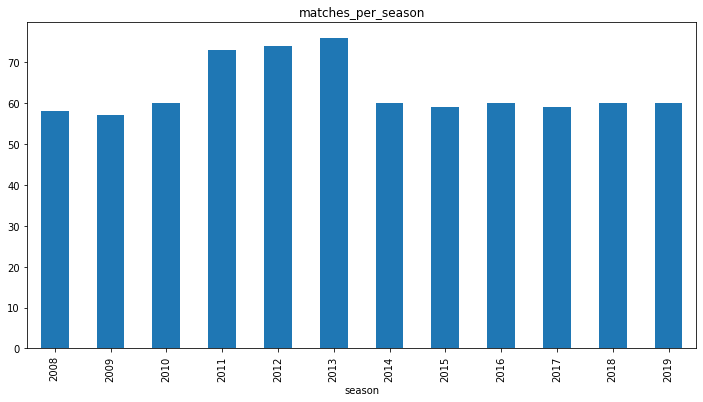

In [22]:
matches_per_season.plot(kind='bar', figsize=(12, 6),
                        title='matches_per_season')


In [25]:
filter1 = (matches_raw_df['win_by_runs'] == 0) & (
    matches_raw_df['result'] == 'normal')


In [26]:
wins_batting_first = matches_raw_df[filter1].groupby(
    'season').winner.count()/matches_per_season * 100
wins_batting_first


season
2008    58.620690
2009    50.877193
2010    46.666667
2011    53.424658
2012    54.054054
2013    48.684211
2014    61.666667
2015    40.677966
2016    65.000000
2017    54.237288
2018    53.333333
2019    58.333333
dtype: float64

In [27]:
filter2 = (matches_raw_df['win_by_wickets'] == 0) & (
    matches_raw_df['result'] == 'normal')
matches_raw_df[filter2]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28/04/19,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan
742,11338,2019,Kolkata,28/04/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon
743,11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan
745,11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon


In [28]:
wins_bowling_first = matches_raw_df[filter2].groupby(
    'season')['winner'].count()/matches_per_season * 100
wins_bowling_first


season
2008    41.379310
2009    47.368421
2010    51.666667
2011    45.205479
2012    45.945946
2013    48.684211
2014    36.666667
2015    54.237288
2016    35.000000
2017    44.067797
2018    46.666667
2019    36.666667
dtype: float64

In [29]:
combined_wins_df = pd.concat([wins_batting_first, wins_bowling_first], axis=1)
combined_wins_df.columns = ['battingfirst', 'bowlingfirst']
combined_wins_df


,battingfirst,bowlingfirst
season,,
2008,58.620690,41.379310
2009,50.877193,47.368421
2010,46.666667,51.666667
2011,53.424658,45.205479
2012,54.054054,45.945946
2013,48.684211,48.684211
2014,61.666667,36.666667
2015,40.677966,54.237288
2016,65.000000,35.000000


<AxesSubplot:xlabel='season'>

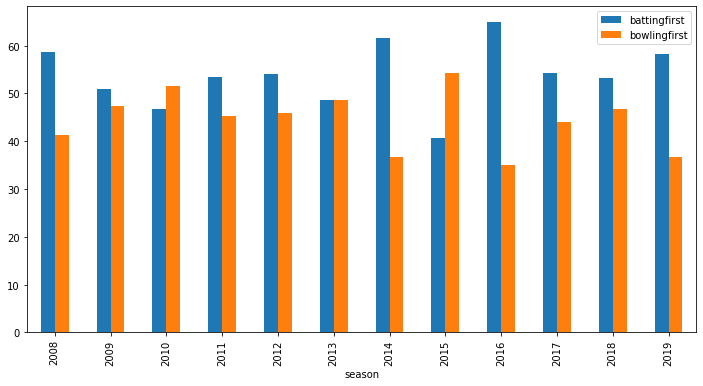

In [30]:
combined_wins_df.plot(kind='bar', figsize=(12, 6))


In [31]:
total_matches_played = (matches_raw_df.team1.value_counts(
)+matches_raw_df.team2.value_counts()).sort_values(ascending=False)


In [32]:
total_matches_played


Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

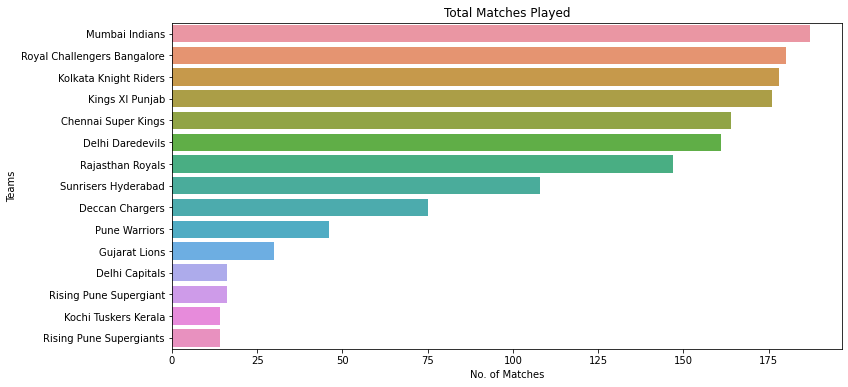

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Total Matches Played')
total_matches_played_plot = sns.barplot(
    y=total_matches_played.index, x=total_matches_played)
total_matches_played_plot.set(ylabel='Teams', xlabel='No. of Matches')


In [34]:
most_wins = matches_raw_df.winner.value_counts()


In [35]:
most_wins


Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [36]:
win_percentage = ((most_wins/total_matches_played)
                  * 100).sort_values(ascending=False)
win_percentage


Delhi Capitals                 62.500000
Rising Pune Supergiant         62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

<AxesSubplot:title={'center':'win percentage'}>

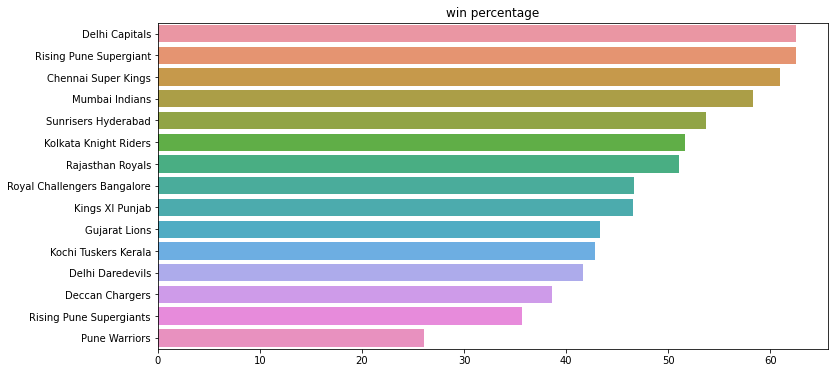

In [37]:
plt.figure(figsize=(12, 6))
plt.title('win percentage')
sns.barplot(y=win_percentage.index, x=win_percentage)

In [38]:
mdf = matches_raw_df


In [39]:
ipl_winners = mdf.groupby('season').tail(1).winner.value_counts()


In [40]:
ipl_winners


Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

<AxesSubplot:title={'center':'IPL Champions'}, xlabel='Teams', ylabel='winner'>

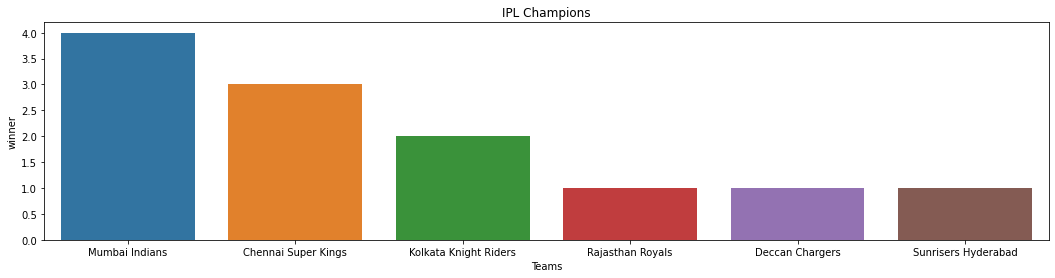

In [41]:
plt.figure(figsize=(18, 4))
plt.xlabel('Teams')
plt.ylabel('No. of Times')
plt.title('IPL Champions')

sns.barplot(y=ipl_winners, x=ipl_winners.index)


In [42]:
mdf['winner']


0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 756, dtype: object

In [43]:
mdf['season']


0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
751    2019
752    2019
753    2019
754    2019
755    2019
Name: season, Length: 756, dtype: int64

In [44]:
matches_won_each_season = pd.crosstab(mdf.season, mdf.winner)


In [46]:
matches_won_each_season


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,
2008,9,2,0,7,0,10,0,6,7,0,13,0,0,4,0
2009,8,9,0,10,0,7,0,3,5,0,6,0,0,9,0
2010,9,8,0,7,0,4,0,7,11,0,6,0,0,8,0
2011,11,6,0,4,0,7,6,8,10,4,6,0,0,10,0
2012,10,4,0,11,0,8,0,12,10,4,7,0,0,8,0
2013,12,0,0,3,0,8,0,6,13,4,11,0,0,9,10
2014,10,0,0,2,0,12,0,11,7,0,7,0,0,5,6
2015,10,0,0,5,0,3,0,7,10,0,7,0,0,8,7
2016,0,0,0,7,9,4,0,8,7,0,0,0,5,9,11


<AxesSubplot:xlabel='season'>

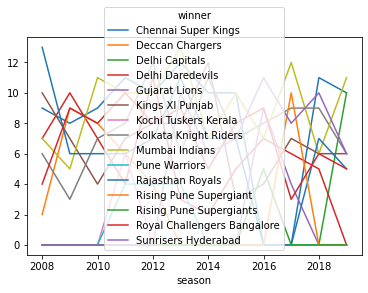

In [50]:
matches_won_each_season.plot()

In [137]:
matches_won_each_season


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,
2008,9,2,0,7,0,10,0,6,7,0,13,0,0,4,0
2009,8,9,0,10,0,7,0,3,5,0,6,0,0,9,0
2010,9,8,0,7,0,4,0,7,11,0,6,0,0,8,0
2011,11,6,0,4,0,7,6,8,10,4,6,0,0,10,0
2012,10,4,0,11,0,8,0,12,10,4,7,0,0,8,0
2013,12,0,0,3,0,8,0,6,13,4,11,0,0,9,10
2014,10,0,0,2,0,12,0,11,7,0,7,0,0,5,6
2015,10,0,0,5,0,3,0,7,10,0,7,0,0,8,7
2016,0,0,0,7,9,4,0,8,7,0,0,0,5,9,11


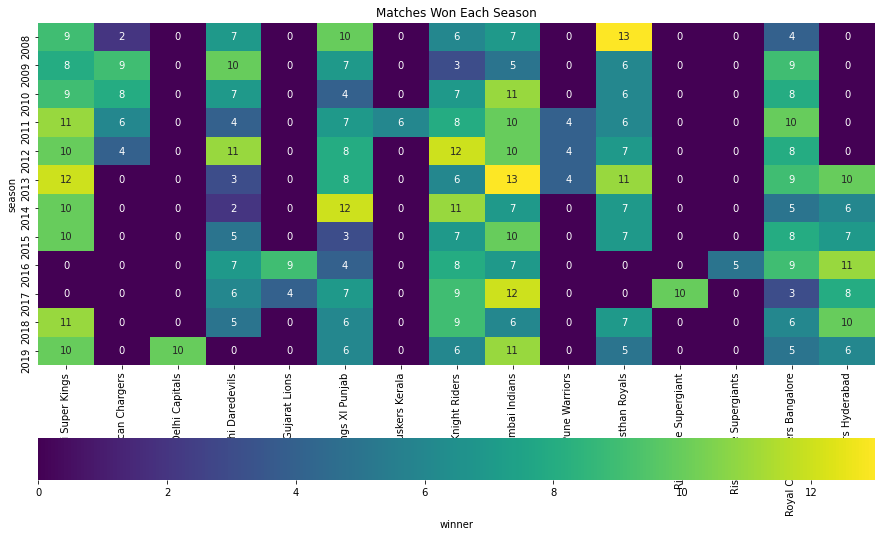

In [48]:
plt.figure(figsize=(15, 9))
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')

sns.heatmap(matches_won_each_season, annot=True, cmap='viridis',
            fmt='d', cbar_kws={"orientation": "horizontal"})


In [ ]:
highest_win_by_runs = mdf.sort_values(mdf['win_by_runs'], ascending=True)
highest_win_by_runs


In [141]:
mdf


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford
